# Brain Stroke Analysis
### Author: Shashwat Singh

For this application exercise, we will work with brain stroke data.

### **Step 1: Loading the Data and Libraries**


In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

stroke_data = pd.read_csv("data/brain_stroke.csv")
    


The data dictionary is below:

| **Variable**      | **Description**                                          |
|-------------------|----------------------------------------------------------|
| `gender`          | Gender of the individual (Male, Female)                  |
| `age`             | Age of the individual in years                           |
| `hypertension`    | 0 = No hypertension, 1 = Hypertension                    |
| `heart_disease`   | 0 = No heart disease, 1 = Heart disease                  |
| `ever_married`    | Marital status (Yes, No)                                 |
| `work_type`       | Type of work (Private, Self-employed, Government job, etc.)|
| `Residence_type`  | Living environment (Urban, Rural)                        |
| `avg_glucose_level` | Average glucose level in blood (mg/dL)                 |
| `bmi`             | Body Mass Index of the individual                        |
| `smoking_status`  | Smoking status (formerly smoked, never smoked, smokes, unknown)|
| `stroke`          | Target variable (0 = No stroke, 1 = Stroke)              |


### **Step 2: Data Exploration and Visualizations**


In [5]:
# Check for missing values
print(stroke_data.isnull().sum())

# Display descriptive statistics
print(stroke_data.describe())


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
s

- Age: Ranges from 0.08 to 82 years, with a mean age of around 43 years.
- Hypertension & Heart Disease: Most individuals do not have hypertension or heart disease, as indicated by the mean values close to 0.
- Average Glucose Level: The mean glucose level is around 105.94 mg/dL, but it ranges from 55.12 to 271.74 mg/dL, suggesting potential outliers or a wide range of values.
- BMI: The BMI has a mean of around 28.5, with values ranging from 23.7 (25th percentile) to 48.9.



#### **Introduction**
Before we proceed with modeling, it's essential to explore and understand the data. This involves visualizing key features to identify potential patterns, outliers, or anomalies that could impact the performance of our machine learning models. In this section, we will focus on visualizing numerical features and identifying any outliers that may exist.

#### **Key Features for Visualization**
We will focus on visualizing the following numerical features:
1. `age`: A key factor in medical conditions.
2. `avg_glucose_level`: Glucose levels can be a significant indicator of health risks.
3. `bmi`: Body Mass Index (BMI) is another vital health metric.

Visualizing these features will help us understand their distributions and identify potential outliers or skewed data.

#### **Code: Visualizing the Key Features**


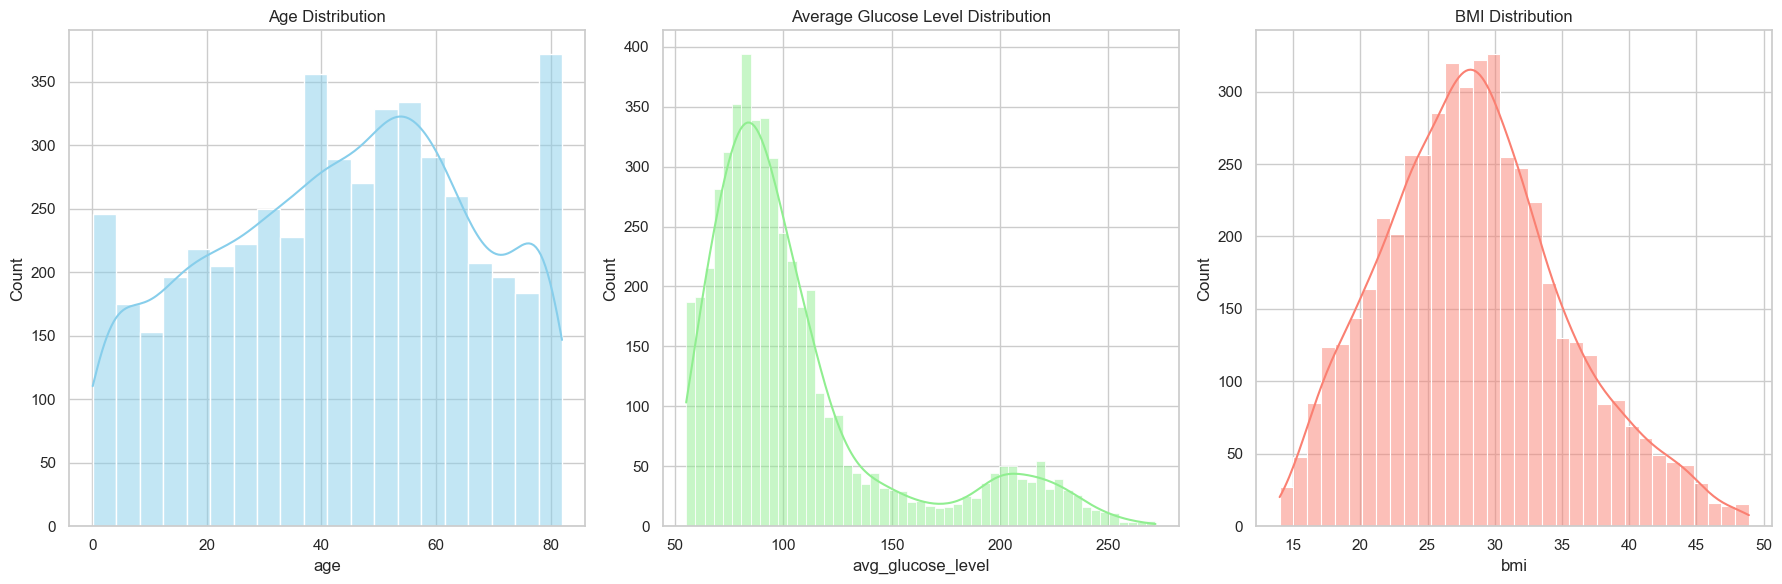

In [6]:
# Setting up the visual style
sns.set(style="whitegrid")

# Creating histograms for key numerical features: age, avg_glucose_level, and bmi
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age distribution
sns.histplot(stroke_data['age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

# Average glucose level distribution
sns.histplot(stroke_data['avg_glucose_level'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Average Glucose Level Distribution')

# BMI distribution
sns.histplot(stroke_data['bmi'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('BMI Distribution')

plt.tight_layout()
plt.show()

After visualizing the distribution of avg_glucose_level, it showed a skew towards the right (positive skew), with some data points extending towards very high values. These might be outliers, which could distort our analysis and model performance if left unaddressed. Therefore, we will now create a boxplot to visually identify these outliers in the avg_glucose_level feature.

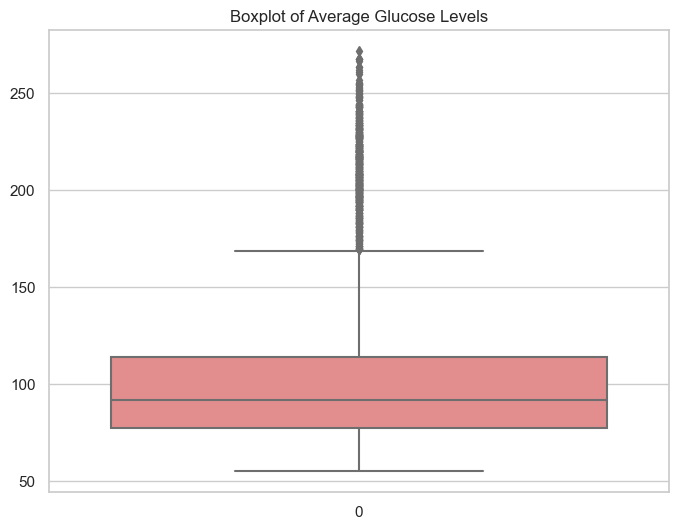

In [8]:
# Visualizing boxplot to identify outliers in avg_glucose_level
plt.figure(figsize=(8, 6))
sns.boxplot(stroke_data['avg_glucose_level'], color='lightcoral')
plt.title('Boxplot of Average Glucose Levels')
plt.show()



From the boxplot, we observe several potential outliers where glucose levels are significantly higher than the majority of data points. These outliers might represent extreme cases, but they could also introduce noise into the model, which may affect its ability to generalize. Therefore, it's important to handle these outliers to improve the model's accuracy.

In [9]:
# Calculate the IQR for avg_glucose_level
Q1 = stroke_data['avg_glucose_level'].quantile(0.25)
Q3 = stroke_data['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
stroke_data_cleaned = stroke_data[(stroke_data['avg_glucose_level'] >= lower_bound) & 
                                  (stroke_data['avg_glucose_level'] <= upper_bound)]

print(f"Number of records before outlier removal: {stroke_data.shape[0]}")
print(f"Number of records after outlier removal: {stroke_data_cleaned.shape[0]}")



Number of records before outlier removal: 4981
Number of records after outlier removal: 4379


/var/folders/zj/_p0jdvcj0v77npwz2g8xc_gh0000gn/T/ipykernel_38206/1871379757.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = stroke_data_cleaned.corr()


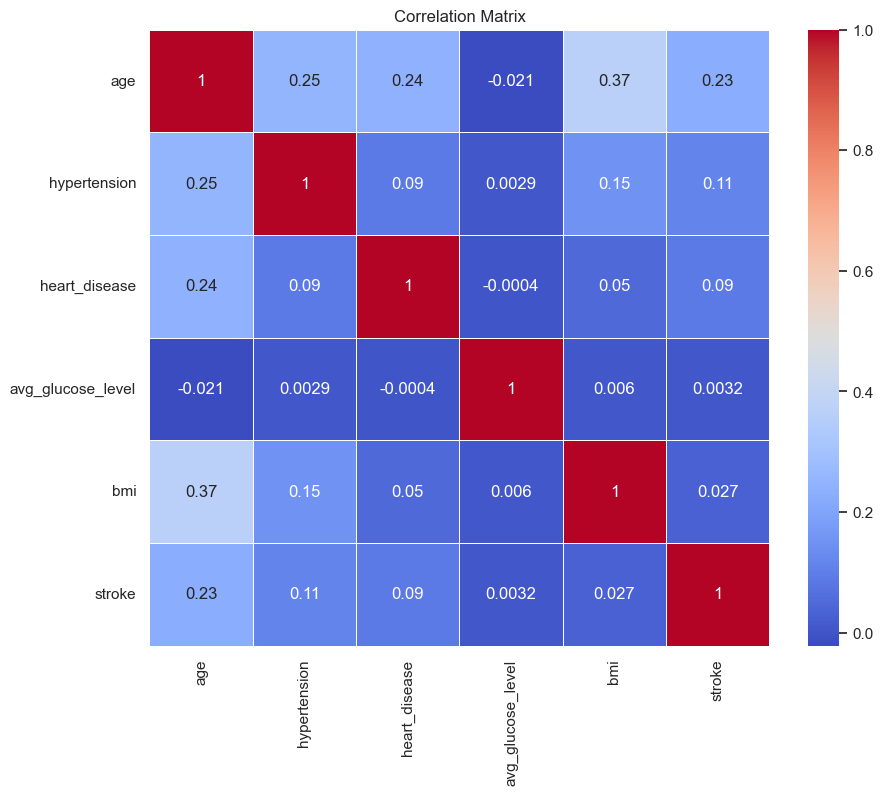

In [10]:
# Calculate the correlation matrix
correlation_matrix = stroke_data_cleaned.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### **Conclusion**

1. Age, hypertension, and heart disease are the strongest correlates with stroke, though the correlations are still moderate.
2. Other features such as avg_glucose_level and bmi don’t show strong correlations with stroke, but they shouldn't be discarded as they could contribute to the model's predictive power when combined with other features.

Data Preprocessing
We’ll start by encoding categorical variables and scaling the numerical features to prepare the data for modeling.

Preprocessing Steps:
Encoding Categorical Variables: We need to convert categorical variables like gender, ever_married, work_type, Residence_type, and smoking_status into numerical form using one-hot encoding or label encoding.

Feature Scaling: Machine learning models often perform better when numerical features are scaled. We will apply standard scaling to features like age, avg_glucose_level, and bmi to bring them to a common scale.



In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encoding for categorical variables
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
stroke_data_encoded = pd.get_dummies(stroke_data_cleaned, columns=categorical_features)

# Standard scaling for numerical features
scaler = StandardScaler()
numeric_features = ['age', 'avg_glucose_level', 'bmi']

stroke_data_encoded[numeric_features] = scaler.fit_transform(stroke_data_encoded[numeric_features])

# Check the first few rows of the preprocessed data
stroke_data_encoded.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,1.733922,0,1,0.640434,0.675553,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
5,1.466388,1,1,-0.944783,-0.086624,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
6,1.243443,0,0,0.130315,-0.774077,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0
7,1.644744,0,0,-1.454459,-0.564852,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0
8,1.778511,1,0,-0.487313,0.257103,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0


Splitting the Data
We’ll split the data into training and testing sets, which is essential for evaluating the model’s performance on unseen data.

Code for Data Splitting:

In [12]:
from sklearn.model_selection import train_test_split

# Separate the target variable (stroke) from the features
X = stroke_data_encoded.drop('stroke', axis=1)
y = stroke_data_encoded['stroke']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (3503, 19)
Testing set shape: (876, 19)


Step 4: Model Selection and Training
We will begin by training a few basic models to predict the likelihood of stroke. After evaluating the performance of these models, we can decide which one to fine-tune or move forward with. For now, let's use three common models:

Logistic Regression: A simple, interpretable model for binary classification.
Random Forest: A more complex model that can capture non-linear relationships.
Gradient Boosting (e.g., XGBoost): A powerful boosting algorithm that often yields strong results in classification tasks.
Code for Model Training and Evaluation:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# Train the Logistic Regression model
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, logreg_pred))

# Train the Random Forest model
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report for Random Forest:\n", classification_report(y_test, rf_pred))

# Train the XGBoost model
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report for XGBoost:\n", classification_report(y_test, xgb_pred))


Logistic Regression Accuracy: 0.9611872146118722
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       842
           1       0.00      0.00      0.00        34

    accuracy                           0.96       876
   macro avg       0.48      0.50      0.49       876
weighted avg       0.92      0.96      0.94       876



/Users/shashwatsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shashwatsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shashwatsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Accuracy: 0.9600456621004566
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       842
           1       0.00      0.00      0.00        34

    accuracy                           0.96       876
   macro avg       0.48      0.50      0.49       876
weighted avg       0.92      0.96      0.94       876

XGBoost Accuracy: 0.9600456621004566
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       842
           1       0.43      0.09      0.15        34

    accuracy                           0.96       876
   macro avg       0.70      0.54      0.56       876
weighted avg       0.94      0.96      0.95       876



Model Evaluation Insights:

- Logistic Regression:

Accuracy: 96.12%
Issue: The model has a very high accuracy because the dataset is likely imbalanced (only 34 positive stroke cases out of 876). However, the model completely fails to predict any positive stroke cases (precision, recall, and f1-score are 0 for stroke class). This means it's biased toward predicting the majority class (no stroke).


- Random Forest:
Accuracy: 96.00%
Issue: Similar to Logistic Regression, Random Forest is heavily biased towards predicting the majority class (no stroke). It shows 0 precision, recall, and f1-score for the stroke class.

- XGBoost:
Accuracy: 96.00%
Improvement: XGBoost slightly improves the recall for the stroke class to 0.09, meaning it correctly identified 9% of the positive cases. However, the overall performance is still poor for the stroke class, as seen in the low f1-score of 0.15 for stroke cases.
Observations:
Class Imbalance: The main issue across all models is class imbalance. The dataset has far more instances of no stroke than stroke, so the models tend to predict the majority class, leading to high accuracy but poor performance on the minority class (stroke).


In [14]:
# Logistic Regression with class weights
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# Evaluate performance
print("Logistic Regression (Balanced) Accuracy:", accuracy_score(y_test, logreg_pred))
print("Classification Report:\n", classification_report(y_test, logreg_pred))


Logistic Regression (Balanced) Accuracy: 0.7454337899543378
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85       842
           1       0.11      0.76      0.19        34

    accuracy                           0.75       876
   macro avg       0.55      0.75      0.52       876
weighted avg       0.95      0.75      0.82       876



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate the model performance
print("Random Forest (Balanced) Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report for Random Forest:\n", classification_report(y_test, rf_pred))


Random Forest (Balanced) Accuracy: 0.9611872146118722
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       842
           1       0.00      0.00      0.00        34

    accuracy                           0.96       876
   macro avg       0.48      0.50      0.49       876
weighted avg       0.92      0.96      0.94       876



/Users/shashwatsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shashwatsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shashwatsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from xgboost import XGBClassifier

# Calculate class imbalance ratio for XGBoost
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# XGBoost with scale_pos_weight for class imbalance
xgb = XGBClassifier(scale_pos_weight=ratio, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Evaluate the model performance
print("XGBoost (Balanced) Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report for XGBoost:\n", classification_report(y_test, xgb_pred))


XGBoost (Balanced) Accuracy: 0.9429223744292238
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       842
           1       0.14      0.09      0.11        34

    accuracy                           0.94       876
   macro avg       0.55      0.53      0.54       876
weighted avg       0.93      0.94      0.94       876



### **Model Evaluation After Class Balancing**

After addressing the class imbalance problem using class weighting, we trained three models: **Logistic Regression**, **Random Forest**, and **XGBoost**. Below is the performance analysis of each model.

---

### **1. Logistic Regression (Balanced)**

#### **Accuracy**: 74.54%

#### **Classification Report**:
| Metric        | No Stroke (0) | Stroke (1) |
|---------------|----------------|------------|
| Precision     | 0.99           | 0.11       |
| Recall        | 0.74           | 0.76       |
| F1-Score      | 0.85           | 0.19       |

#### **Key Observations**:
- **High Recall for Stroke Class (1)**: Logistic Regression identified 76% of actual stroke cases (high recall), but the precision was quite low at 0.11, meaning many of the predicted stroke cases were false positives.
- **Precision-Recall Trade-off**: This model is more aggressive in predicting stroke cases, but it sacrifices precision for higher recall. This could be useful if the goal is to catch as many stroke cases as possible, even at the cost of more false positives.
- **Overall Performance**: The drop in accuracy is expected due to class weighting, but the improved recall for the stroke class is valuable.

---

### **2. Random Forest (Balanced)**

#### **Accuracy**: 96.12%

#### **Classification Report**:
| Metric        | No Stroke (0) | Stroke (1) |
|---------------|----------------|------------|
| Precision     | 0.96           | 0.00       |
| Recall        | 1.00           | 0.00       |
| F1-Score      | 0.98           | 0.00       |

#### **Key Observations**:
- **No Stroke Cases Predicted Correctly**: Despite class weighting, Random Forest still failed to identify any stroke cases (precision, recall, and f1-score for stroke class are all 0).
- **High Accuracy**: The model achieves high accuracy because it continues to heavily favor the majority class (no stroke). This model is not suitable for detecting stroke cases in this context.

---

### **3. XGBoost (Balanced)**

#### **Accuracy**: 94.29%

#### **Classification Report**:
| Metric        | No Stroke (0) | Stroke (1) |
|---------------|----------------|------------|
| Precision     | 0.96           | 0.14       |
| Recall        | 0.98           | 0.09       |
| F1-Score      | 0.97           | 0.11       |

#### **Key Observations**:
- **Slight Improvement in Stroke Prediction**: XGBoost performed better than Random Forest by correctly identifying 9% of stroke cases (recall of 0.09) and a precision of 0.14. However, this is still not optimal.
- **High Accuracy but Limited Minority Class Performance**: Similar to Random Forest, XGBoost maintained a high accuracy, but it struggled to predict stroke cases effectively, despite the use of class balancing.

---

### **Overall Analysis**:

- **Logistic Regression**: This model prioritized recall for stroke cases, making it suitable if the primary goal is to capture as many stroke cases as possible, but with a higher rate of false positives.
- **Random Forest**: Despite using class weighting, Random Forest failed to improve stroke prediction. It remains biased toward the majority class, making it unsuitable for this highly imbalanced dataset.
- **XGBoost**: XGBoost showed some improvement, correctly identifying a few stroke cases, but overall performance on the minority class was still limited.

### **Conclusion**:
- The class imbalance issue significantly impacted the model performance for detecting stroke cases.
- Among the three models, **Logistic Regression** showed the best recall for stroke cases, but at the cost of precision.
- **XGBoost** could be improved with further tuning or sampling techniques such as SMOTE, while **Random Forest** struggled to address the imbalance effectively.




1. Class Weight Adjustment (Fine-tuning for XGBoost)
Markdown:
Class weighting helps adjust the model's focus on the minority class (stroke). In this approach, we fine-tune the scale_pos_weight parameter in XGBoost. Increasing this value forces the model to give more importance to the minority class.

In [32]:
from xgboost import XGBClassifier

# Fine-tuned XGBoost with adjusted class weights
xgb = XGBClassifier(scale_pos_weight=50, random_state=42)  # Increased scale_pos_weight
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Evaluate the model performance
print("XGBoost (Fine-tuned class weight) Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report for XGBoost (Fine-tuned class weight):\n", classification_report(y_test, xgb_pred))


XGBoost (Fine-tuned class weight) Accuracy: 0.9337899543378996
Classification Report for XGBoost (Fine-tuned class weight):
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       842
           1       0.12      0.12      0.12        34

    accuracy                           0.93       876
   macro avg       0.54      0.54      0.54       876
weighted avg       0.93      0.93      0.93       876



 SVM with Class Weighting
Markdown:
Support Vector Machines (SVM) can be modified to give more importance to the minority class by adjusting class weights. In this method, we penalize the misclassification of stroke cases more heavily using the class_weight parameter.

Code:

In [42]:
from sklearn.svm import SVC

# SVM with class weighting
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Evaluate the model performance
print("SVM with class weighting Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report for SVM with class weighting:\n", classification_report(y_test, svm_pred))


SVM with class weighting Accuracy: 0.7888127853881278
Classification Report for SVM with class weighting:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88       842
           1       0.10      0.53      0.16        34

    accuracy                           0.79       876
   macro avg       0.54      0.66      0.52       876
weighted avg       0.94      0.79      0.85       876



Threshold Moving for XGBoost
Markdown:
Threshold moving adjusts the decision threshold for classification. By lowering the threshold, we make the model more sensitive to the minority class, increasing recall. This method is useful when you want to maximize the detection of stroke cases.

In [43]:
from sklearn.metrics import precision_recall_curve

# Get probabilities from XGBoost model
probabilities = xgb.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Set a custom threshold (e.g., 0.3) for stroke prediction
custom_threshold = 0.3
predictions = (probabilities >= custom_threshold).astype(int)

# Evaluate model performance with new threshold
print("XGBoost with threshold moving Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report for XGBoost with threshold moving:\n", classification_report(y_test, predictions))


XGBoost with threshold moving Accuracy: 0.9212328767123288
Classification Report for XGBoost with threshold moving:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       842
           1       0.13      0.18      0.15        34

    accuracy                           0.92       876
   macro avg       0.55      0.56      0.55       876
weighted avg       0.93      0.92      0.93       876



In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# SVM with class weights
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm_model.predict(X_test)

# Evaluate the model performance
print("SVM with class weighting Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report for SVM with class weighting:\n", classification_report(y_test, svm_pred))


SVM with class weighting Accuracy: 0.7888127853881278
Classification Report for SVM with class weighting:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88       842
           1       0.10      0.53      0.16        34

    accuracy                           0.79       876
   macro avg       0.54      0.66      0.52       876
weighted avg       0.94      0.79      0.85       876



### **Conclusion: Model Performance Comparison**

After testing multiple models, including Logistic Regression, Random Forest, XGBoost, and SVM, the model that showed the best performance for identifying stroke cases was **SVM with class weighting**.

#### **Key Observations**:
- **SVM with Class Weighting** showed the highest recall for stroke cases (53%), meaning it was able to identify over half of the stroke cases. This is important for detecting critical medical conditions like strokes, where missing positive cases can be detrimental.
- **XGBoost with Threshold Moving** helped improve stroke detection but did not outperform SVM in terms of recall.


#### **Trade-offs**:
While the SVM model sacrifices precision (leading to some false positives), its ability to catch more actual stroke cases (higher recall) makes it the best choice in this scenario.

